In [1]:
import pandas as pd
import numpy as np
from fastparquet import ParquetFile

In [2]:
pf = ParquetFile("nyt_data.parquet")

# What does the data look like?
pf.head(1)

# #for df in pf.iter_row_groups():
# df = next(iter(pf.iter_row_groups()))
# df.head()


,year,title,excerpt
0,1920,At last the Federal Reserve Board has issued r...,


In [3]:
# getting just the smaller columns for now
df = pf.to_pandas(columns=['year','title'])

In [4]:
# total rows
df.shape

(17370913, 2)

# Duplicate Analysis

In [5]:
# any duplicates?
dups = df.groupby(by='title').size()
dups.shape

(10718164,)

In [6]:
# that's a lot of duplicates... how many per title?

dups_sort = dups.sort_values(ascending=False).head(1000)
dups_sort.to_csv("titles.csv")

dups_sort
# 13372 is a lot of dups. 
# Are they actually the same article? 
# Should we ignore generic No Titles?

title
Article 1 -- No Title                      13372
Birth Notice 1 -- No Title                 12239
Article 2 -- No Title                      12043
Marriage Announcement 1 -- No Title        11407
Article 3 -- No Title                      11302
                                           ...  
The World                                    110
Article 38 -- No Title                       110
Television highlights. What’s on Monday      110
News Conference in Brief                     109
Hearing                                      109
Length: 1000, dtype: int64

In [7]:
# convert to dataframe
dups = dups.reset_index(name='count')

In [8]:
# How long are the titles?
dups['title_size'] = dups['title'].str.len()
dups.head()

,title,count,title_size
0,,261,0
1,!,2,1
2,! Print the Recipes,2,20
3,! ! MISS OBERWACER EN6AGED TO WED,1,33
4,"! ""JINGO BELLS, JINGO BELLS""",1,28


In [9]:
# no scientific notation
pd.set_option('display.float_format', '{:.5f}'.format)

# Statistics
dups.describe()

,count,title_size
count,10718164.00000,10718164.00000
mean,1.62070,177.37986
std,14.89165,310.88654
min,1.00000,0.00000
25%,1.00000,50.00000
50%,2.00000,106.00000
75%,2.00000,222.00000
max,13372.00000,99175.00000


<Axes: >

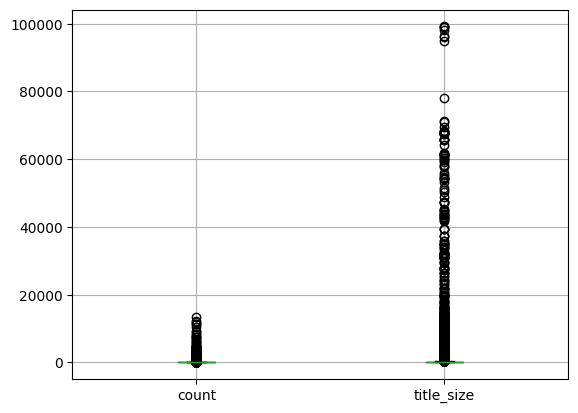

In [ ]:
dups.boxplot()

# Missing Values Analysis

In [ ]:
# how many per year?
years = df.groupby(by="year").count()
years.to_csv("years.csv")
years

,title
year,
1920,133572
1921,153635
1922,109718
1923,107760
1924,10552
...,...
2016,105606
2017,91092
2018,50857


<Axes: title={'center': 'Articles per Year'}, xlabel='Year', ylabel='Number of Articles'>

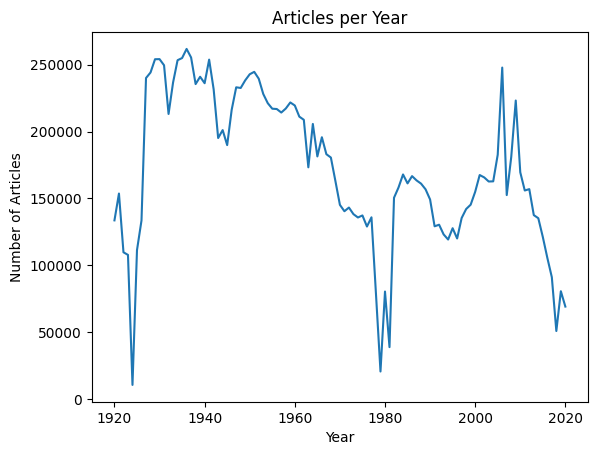

In [11]:
# there seems to be no gaps within the years
df.groupby(by="year")['title'].count().plot.line(title='Articles per Year', ylabel='Number of Articles', xlabel='Year')

In [ ]:
# how many titles are missing or are no title?
df_missing = df[
    (df['title'].str.lower().str.contains("no title", na=False)) | 
    (df['title'].isnull()) | 
    (df['title'].str.strip() == '')
    ]

df_missing.shape

(319654, 2)

In [ ]:
df_missing.head()

,year,title
30,1920,Marriage Announcement 2 -- No Title
53,1920,Obituary 4 -- No Title
80,1920,Obituary 4 -- No Title
103,1920,Obituary 2 -- No Title
114,1920,Birth Notice 1 -- No Title


# Excerpt Analysis

In [ ]:
# lets get some excerpt data now
df_e = pf.to_pandas()

df_e.head()

,year,title,excerpt
0,1920,At last the Federal Reserve Board has issued r...,
1,1920,WILL TEST DOOR SERVICE.,Service Board to Further Examine I.R.T. Safety...
2,1920,Sanction for Chinese Contracts.,
3,1920,"LEADS FRAZIER BY 4,496.",Langer's Margin Falls in North Dakota--Gronna ...
4,1920,"CHICAGO, April 30.--With 300 suspicious charac...",Federal Agents and Police Round-- up Suspiciou...


## Data Structure
What is the size of the excerpts on average?

In [ ]:
df_e['excerpt_len'] = df_e['excerpt'].str.len()
df_e['title_len'] = df_e['title'].str.len()
df_e.head()

,year,title,excerpt,excerpt_len,title_len
0,1920,At last the Federal Reserve Board has issued r...,,0,161
1,1920,WILL TEST DOOR SERVICE.,Service Board to Further Examine I.R.T. Safety...,57,23
2,1920,Sanction for Chinese Contracts.,,0,31
3,1920,"LEADS FRAZIER BY 4,496.",Langer's Margin Falls in North Dakota--Gronna ...,57,23
4,1920,"CHICAGO, April 30.--With 300 suspicious charac...",Federal Agents and Police Round-- up Suspiciou...,72,228


In [ ]:
df_e.describe()

,year,excerpt_len,title_len
count,17370913.00000,17370913.00000,17370913.00000
mean,1965.37512,65.57131,167.65887
std,28.07526,384.16136,300.78109
min,1920.00000,0.00000,0.00000
25%,1941.00000,0.00000,42.00000
50%,1961.00000,0.00000,96.00000
75%,1990.00000,73.00000,213.00000
max,2020.00000,497808.00000,99175.00000


## Duplicate Analysis

In [ ]:
df_e_dups = df_e.drop_duplicates()

df_e_dups.shape

# so there are 6,343,378 duplicates

(11027535, 5)

## Missing Values

In [ ]:
# rows where excerpt is missing
df_e_m = df_e[
    (df_e['excerpt'].isnull()) | 
    (df_e['excerpt'].str.strip() == '')
    ]

df_e_m.shape

(9405332, 5)

In [ ]:
# how many are missing titles AND excerpts?
df_e_m[
    (df_e_m['title'].str.lower().str.contains("no title", na=False)) | 
    (df_e_m['title'].isnull()) | 
    (df_e_m['title'].str.strip() == '')
].shape

(312275, 5)